# Prepare stock market data

## Task 1. a

### 1. Find all stock csv files (incorrectly labelled as txt)

In [2]:
import glob

base_path = './stock-market/Data/Stocks'
paths = []

for file in glob.glob(base_path + '/*.txt'):
    paths.append(file)

paths[:5]

['./stock-market/Data/Stocks/sdrl.us.txt',
 './stock-market/Data/Stocks/esge.us.txt',
 './stock-market/Data/Stocks/jobs.us.txt',
 './stock-market/Data/Stocks/pacb.us.txt',
 './stock-market/Data/Stocks/iac.us.txt']

### 2. Create dataframe while removing empty files

In [3]:
import pandas as pd

df_list = []
empty_file_symbols = []

count = 0
for path in paths:
    count += 1
    symbol = path.split('/')[-1].split('.')[0]

    # Attempt to read the stock data
    try:
        stock_df = pd.read_csv(path)
        stock_df['Symbol'] = symbol
        df_list.append(stock_df)

    # If stock data is invalid or doens't exist, ignore
    except:
        empty_file_symbols.append(symbol)

df = pd.concat(df_list, ignore_index=True)
df['Date'] = pd.to_datetime(df['Date'])
df['Symbol'] = df['Symbol'].astype('string')

df.head()

,Date,Open,High,Low,Close,Volume,OpenInt,Symbol
0,2005-08-25,5.5182,5.5182,5.5182,5.5182,16962,0,sdrl
1,2005-09-01,6.1761,6.1761,6.1761,6.1761,1698,0,sdrl
2,2005-09-02,6.0700,6.1761,6.0347,6.0700,18727,0,sdrl
3,2005-09-06,5.9286,6.0700,5.7517,5.9286,55410,0,sdrl
4,2005-09-07,5.8224,6.1054,5.7517,5.8224,47212,0,sdrl


### 3. Show column data types

In [4]:
print('Data types of columns:')
print(df.dtypes)

Data types of columns:
Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
Symbol     string[python]
dtype: object


### 4. Summary statistics

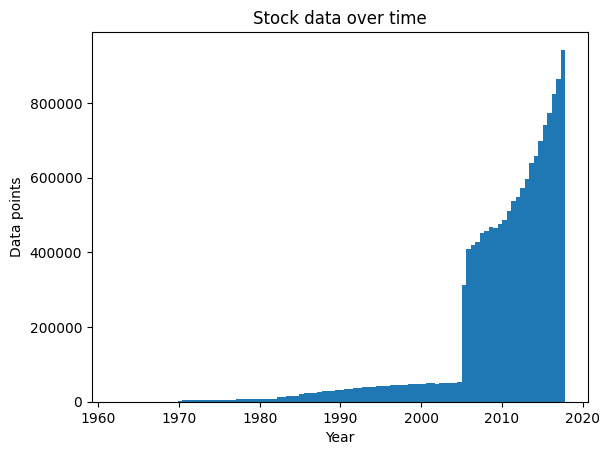

In [5]:
import matplotlib.pyplot as plt

plt.hist(data=df, x='Date', bins=100)
plt.title('Stock data over time')
plt.xlabel('Year')
plt.ylabel('Data points')
plt.show()

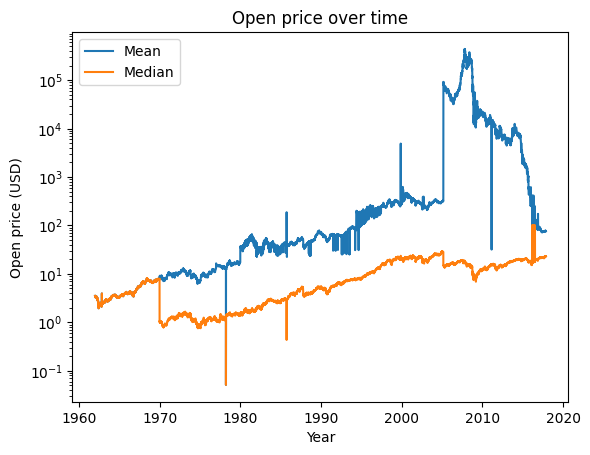

In [6]:
date_data = df.groupby('Date')
dates = date_data.indices.keys()

plt.plot(dates, date_data['Open'].mean(), label='Mean')
plt.plot(dates, date_data['Open'].median(), label='Median')
plt.title('Open price over time')
plt.xlabel('Year')
plt.ylabel('Open price (USD)')
plt.yscale('log')
plt.legend()
plt.show()

## Task 1. b

### 1. Find missing values

In [7]:
print('Missing values in data:')
print(df.isna().sum())

print('\nStock symbols with empty files:')
print(len(empty_file_symbols), '-', empty_file_symbols)

Missing values in data:
Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Symbol     0
dtype: int64

Stock symbols with empty files:
32 - ['vist', 'bolt', 'ehr', 'rbio', 'pbio', 'sfix', 'boxl', 'asns', 'accp', 'bxg', 'amrhw', 'sail', 'amrh', 'stnl', 'scci', 'vmet', 'pxus', 'hayu', 'send', 'mapi', 'srva', 'bbrx', 'znwaa', 'sbt', 'wnfm', 'fmax', 'molc', 'wspt', 'gnst', 'scph', 'jt', 'otg']


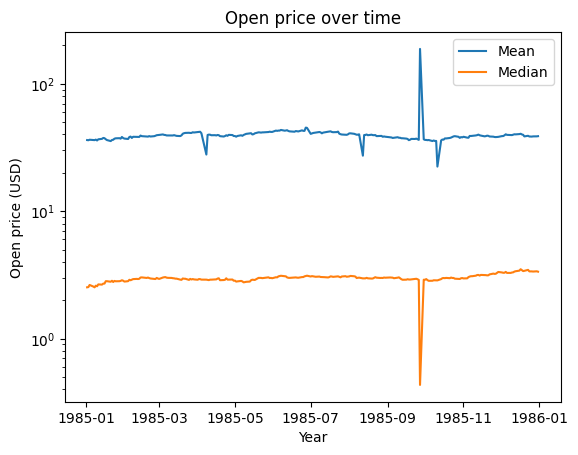

In [8]:
import datetime as dt

date_data = df[(df['Date'] > dt.datetime(1985, 1, 1)) & (df['Date'] < dt.datetime(1986, 1, 1))].groupby('Date')
dates = date_data.indices.keys()

plt.plot(dates, date_data['Open'].mean(), label='Mean')
plt.plot(dates, date_data['Open'].median(), label='Median')
plt.title('Open price over time')
plt.xlabel('Year')
plt.ylabel('Open price (USD)')
plt.yscale('log')
plt.legend()
plt.show()

## Task 2. a

### Ignore empty/invalid csv's

In [9]:
print('Total stock csv\'s:', len(paths))
print('Empty/invalid stock csv\'s:', len(empty_file_symbols))

Total stock csv's: 7195
Empty/invalid stock csv's: 32


Ignore empty or invalid stock csv's since there are way less than the total.

## Task 2. b

### Drop OpenInt since ever value is 0

In [10]:
print('Unique values in OpenInt column:', df['OpenInt'].unique())

df = df.drop(columns=['OpenInt'])

df.head()

Unique values in OpenInt column: [0]


,Date,Open,High,Low,Close,Volume,Symbol
0,2005-08-25,5.5182,5.5182,5.5182,5.5182,16962,sdrl
1,2005-09-01,6.1761,6.1761,6.1761,6.1761,1698,sdrl
2,2005-09-02,6.0700,6.1761,6.0347,6.0700,18727,sdrl
3,2005-09-06,5.9286,6.0700,5.7517,5.9286,55410,sdrl
4,2005-09-07,5.8224,6.1054,5.7517,5.8224,47212,sdrl


## Task 3. a

### Find z-score for each column

In [11]:
zscore_fields = ['Open', 'High', 'Low', 'Close', 'Volume']

for field in zscore_fields:
    df[f'{field}_zscore'] = (df[field] - df[field].mean())/df[field].std(ddof=0)

df.head()

,Date,Open,High,Low,Close,Volume,Symbol,Open_zscore,High_zscore,Low_zscore,Close_zscore,Volume_zscore
0,2005-08-25,5.5182,5.5182,5.5182,5.5182,16962,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.205466
1,2005-09-01,6.1761,6.1761,6.1761,6.1761,1698,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.207465
2,2005-09-02,6.0700,6.1761,6.0347,6.0700,18727,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.205234
3,2005-09-06,5.9286,6.0700,5.7517,5.9286,55410,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.200430
4,2005-09-07,5.8224,6.1054,5.7517,5.8224,47212,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.201504


In [12]:
df[(df['Open_zscore'] > 3) | (df['Open_zscore'] < -3)
   | (df['High_zscore'] > 3) | (df['High_zscore'] < -3)
   | (df['Low_zscore'] > 3) | (df['Low_zscore'] < -3)
   | (df['Close_zscore'] > 3) | (df['Close_zscore'] < -3)
   | (df['Volume_zscore'] > 3) | (df['Volume_zscore'] < -3)]

,Date,Open,High,Low,Close,Volume,Symbol,Open_zscore,High_zscore,Low_zscore,Close_zscore,Volume_zscore
2275,2014-11-26,18.280,18.410,15.930,15.990,84967669,sdrl,-0.007226,-0.007215,-0.007251,-0.007231,10.920747
2276,2014-11-28,15.000,15.100,14.260,14.660,28057094,sdrl,-0.007227,-0.007216,-0.007252,-0.007231,3.467023
2277,2014-12-01,14.460,14.550,13.310,13.920,34499659,sdrl,-0.007227,-0.007216,-0.007252,-0.007231,4.310822
2278,2014-12-02,13.970,14.390,13.250,13.380,26472825,sdrl,-0.007227,-0.007216,-0.007252,-0.007231,3.259527
2281,2014-12-05,12.020,12.700,11.780,12.320,24580125,sdrl,-0.007227,-0.007216,-0.007252,-0.007232,3.011635
...,...,...,...,...,...,...,...,...,...,...,...,...
14852187,2010-01-07,10.673,10.859,10.652,10.744,25645141,rost,-0.007228,-0.007217,-0.007253,-0.007232,3.151123
14854658,2007-02-13,32.342,32.671,27.732,28.222,25387116,ndaq,-0.007223,-0.007212,-0.007248,-0.007228,3.117329
14855084,2008-10-21,29.938,31.653,29.275,30.031,32550096,ndaq,-0.007223,-0.007212,-0.007248,-0.007227,4.055483
14881081,2010-11-09,7.650,8.970,7.380,7.740,31303281,llnw,-0.007228,-0.007217,-0.007253,-0.007233,3.892184


### Remove outliers (z-score below -3 or above 3)

In [13]:
df = df[(df['Open_zscore'] < 3) & (df['Open_zscore'] > -3)
   & (df['High_zscore'] < 3) & (df['High_zscore'] > -3)
   & (df['Low_zscore'] < 3) & (df['Low_zscore'] > -3)
   & (df['Close_zscore'] < 3) & (df['Close_zscore'] > -3)
   & (df['Volume_zscore'] < 3) & (df['Volume_zscore'] > -3)]

df.drop(columns=[f'{field}_zscore' for field in zscore_fields])

,Date,Open,High,Low,Close,Volume,Symbol
0,2005-08-25,5.5182,5.5182,5.5182,5.5182,16962,sdrl
1,2005-09-01,6.1761,6.1761,6.1761,6.1761,1698,sdrl
2,2005-09-02,6.0700,6.1761,6.0347,6.0700,18727,sdrl
3,2005-09-06,5.9286,6.0700,5.7517,5.9286,55410,sdrl
4,2005-09-07,5.8224,6.1054,5.7517,5.8224,47212,sdrl
...,...,...,...,...,...,...,...
14887660,2017-11-06,0.9000,0.9000,0.7820,0.8100,14988,andaw
14887661,2017-11-07,0.8200,0.8200,0.7800,0.7998,111651,andaw
14887662,2017-11-08,0.8000,0.8100,0.0372,0.8000,151600,andaw
14887663,2017-11-09,0.8000,0.8000,0.7900,0.8000,85431,andaw


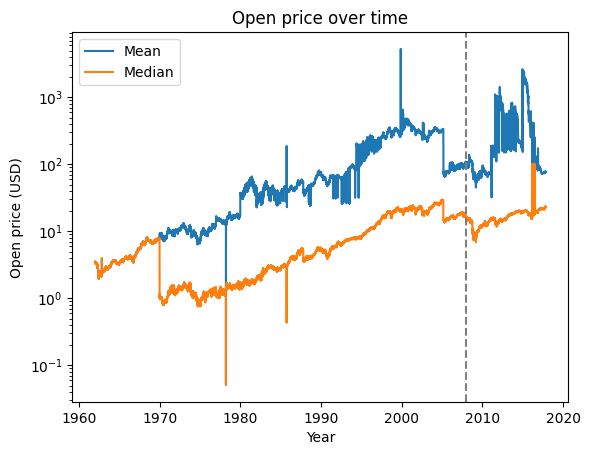

In [14]:
date_data = df.groupby('Date')
dates = date_data.indices.keys()

plt.plot(dates, date_data['Open'].mean(), label='Mean')
plt.plot(dates, date_data['Open'].median(), label='Median')
plt.title('Open price over time')
plt.xlabel('Year')
plt.ylabel('Open price (USD)')
plt.yscale('log')
plt.legend()
plt.axvline(pd.to_datetime('2008'), color='gray', linestyle='--', label='2008 Housing Crisis')
plt.show()

### Apply label encoding to Symbol column

In [15]:
from sklearn import preprocessing

df['Symbol_label'] = preprocessing.LabelEncoder().fit_transform(df['Symbol'])

df.head()

,Date,Open,High,Low,Close,Volume,Symbol,Open_zscore,High_zscore,Low_zscore,Close_zscore,Volume_zscore,Symbol_label
0,2005-08-25,5.5182,5.5182,5.5182,5.5182,16962,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.205466,5762
1,2005-09-01,6.1761,6.1761,6.1761,6.1761,1698,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.207465,5762
2,2005-09-02,6.0700,6.1761,6.0347,6.0700,18727,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.205234,5762
3,2005-09-06,5.9286,6.0700,5.7517,5.9286,55410,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.200430,5762
4,2005-09-07,5.8224,6.1054,5.7517,5.8224,47212,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.201504,5762


In [17]:
import numpy as np

df_scaled = df.copy()

for column in zscore_fields:
    df_scaled[column] = np.log(df_scaled[column])

for column in zscore_fields:
    df_scaled[column] = (df_scaled[column] - df_scaled[column].min()) / (df_scaled[column].max() - df_scaled[column].min())

df_scaled.head()

/home/seandreassen/dev/IT3212/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/seandreassen/dev/IT3212/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Date,Open,High,Low,Close,Volume,Symbol,Open_zscore,High_zscore,Low_zscore,Close_zscore,Volume_zscore,Symbol_label
0,2005-08-25,NaN,0.330526,NaN,0.333170,NaN,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.205466,5762
1,2005-09-01,NaN,0.335675,NaN,0.338305,NaN,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.207465,5762
2,2005-09-02,NaN,0.335675,NaN,0.337515,NaN,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.205234,5762
3,2005-09-06,NaN,0.334883,NaN,0.336440,NaN,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.200430,5762
4,2005-09-07,NaN,0.335149,NaN,0.335616,NaN,sdrl,-0.007229,-0.007218,-0.007254,-0.007233,-0.201504,5762
